In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import os

%matplotlib inline

/home/koushikbhat/anaconda3/envs/DLI/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


######## Ref : https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

In [2]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

In [3]:
#DLI5179/PA1/t10k-images.idx3-ubyte
# Set file paths based on added MNIST Datasets
#
input_path = '/home/koushikbhat/Documents/DLI5179/PA1/'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

        

In [4]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
np.sum(counts)

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


60000

In [5]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

np.sum(counts)


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


10000

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
m_train = x_train.shape[0]
m_test =  x_test.shape[0]
num_px = x_test.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000
Height/Width of each image: num_px = 28
train_set_x shape: (60000, 28, 28)
train_set_y shape: (60000,)
test_set_x shape: (10000, 28, 28)
test_set_y shape: (10000,)


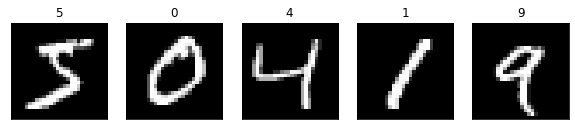

In [8]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [9]:
y_train.shape

(60000,)

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(y_train,1)).toarray()
y_OH_test = enc.fit_transform(np.expand_dims(y_test,1)).toarray()
print(y_OH_train.shape, y_OH_test.shape)

(60000, 10) (10000, 10)


In [11]:
y_train = y_OH_train.T
y_test =y_OH_test.T

In [12]:
"""
# Convert y_train into one-hot format
from tensorflow.keras.utils import to_categorical
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)
"""

'\n# Convert y_train into one-hot format\nfrom tensorflow.keras.utils import to_categorical\ntemp = []\nfor i in range(len(y_train)):\n    temp.append(to_categorical(y_train[i], num_classes=10))\ny_train = np.array(temp)# Convert y_test into one-hot format\ntemp = []\nfor i in range(len(y_test)):    \n    temp.append(to_categorical(y_test[i], num_classes=10))\ny_test = np.array(temp)\n'

In [13]:
print(y_train.shape)
print(y_test.shape)

(10, 60000)
(10, 10000)


In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
# Reshape the training and test examples

train_set_x_flatten = x_train.reshape(x_train.shape[0], -1)
test_set_x_flatten = x_test.reshape(x_test.shape[0], -1)


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))

train_set_x_flatten shape: (60000, 784)
test_set_x_flatten shape: (10000, 784)


In [16]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [17]:
train_set_x = train_set_x.transpose()
test_set_x = test_set_x.T.transpose()

In [18]:
y_train.shape

(10, 60000)

In [19]:
train_set_x.shape

(784, 60000)

In [20]:
train_set_x = train_set_x[:, :1000]
print(train_set_x.shape)
y_train = y_train[:,:1000]
print(y_train.shape)

(784, 1000)
(10, 1000)


In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x)/sum(np.exp(x))



In [22]:
def grad_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

def grad_relu(x):
    return x>0

def derivative_of_softmax(x):

    return softmax(x)*(1-softmax(x))

In [23]:
def init_weights(ni,nh):  # Glorot uniform
  nin = ni; nout = nh
  sd = np.sqrt(6.0 / (nin + nout))
  #print(sd)
  W = []
  for i in range(ni):
    for j in range(nh):
      x = np.float32(np.random.uniform(-sd, sd))
      print(x)
      W.append(x)
  return W
      

In [24]:
#I/P → h 1 (500) → h 2 (250) → h 3 (100) → O/P

In [25]:

"""
def initialize_parameters(n_x, n_h1,n_h2,n_h3, n_y):
    W1 = init_weights(n_h1, n_x)
    W2 = init_weights(n_h2, n_h1)
    W3 = init_weights(n_h3, n_h2)
    W4 = init_weights(n_y, n_h3)
    b1 = np.zeros((n_h1, 1))
    b2 = np.zeros((n_h2, 1))
    b3 = np.zeros((n_h3, 1))
    b4 = np.zeros((n_y, 1))
    return W1, W2, W3, W4 ,b1, b2, b3 ,b4
    """

'\ndef initialize_parameters(n_x, n_h1,n_h2,n_h3, n_y):\n    W1 = init_weights(n_h1, n_x)\n    W2 = init_weights(n_h2, n_h1)\n    W3 = init_weights(n_h3, n_h2)\n    W4 = init_weights(n_y, n_h3)\n    b1 = np.zeros((n_h1, 1))\n    b2 = np.zeros((n_h2, 1))\n    b3 = np.zeros((n_h3, 1))\n    b4 = np.zeros((n_y, 1))\n    return W1, W2, W3, W4 ,b1, b2, b3 ,b4\n    '

In [26]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b1 -- bias vector of shape (layer_dims[l], 1)
                    Wl -- weight matrix of shape (layer_dims[l-1], layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
                    
    Tips:
    - For example: the layer_dims for the "Planar Data classification model" would have been [2,2,1]. 
    This means W1's shape was (2,2), b1 was (1,2), W2 was (2,1) and b2 was (1,1). Now you have to generalize it!
    - In the for loop, use parameters['W' + str(l)] to access Wl, where l is the iterative integer.
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [27]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation (and computes the loss) presented in Figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
                    W4
                    b4
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
        
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    print("input X ", X.shape)
    print("W1",W1.shape)
    print("b1",b1.shape)
    print("W2",W2.shape)
    print("b2",b2.shape)
    print("W3",W3.shape)
    print("b3",b3.shape)
    print("W4",W4.shape)
    print("b4",b4.shape)

    
    Z1 = np.dot(W1, X) + b1
    print("Z1",Z1.shape)
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    print("Z2",Z2.shape)
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2) + b3
    print("Z3",Z3.shape)
    A3 = sigmoid(Z3)
    print("A3",A3.shape)
    Z4 = np.dot(W4, A3) + b4
    print("Z4",Z4.shape)
    A4 = softmax(Z4)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3, Z4 , A4 ,W4 ,b4)
    
    return A4, cache

In [28]:
def backward_propagation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3 ,Z4 , A4 ,W4 ,b4 ) = cache
    print("W1",W1.shape)
    print("b1",b1.shape)
    print("W2",W2.shape)
    print("b2",b2.shape)
    print("W3",W3.shape)
    print("b3",b3.shape)
    print("W4",W4.shape)
    print("b4",b4.shape)
    print("A1",A1.shape)
    print("A2",A2.shape)
    print("A3",A3.shape)
    print("A4",A4.shape)
    
    """W1 (500, 784)
            b1 (500, 1)
            W2 (250, 500)
            b2 (250, 1)
            W3 (100, 250)
            b3 (100, 1)
            W4 (10, 1000) #error
            b4 (10, 1000)
            A1 (500, 1000)
            A2 (250, 1000)
            A3 (100, 1000)
            A4 (10, 1)

dW4 (10, 100)
dZ4 (10, 1000)
db4(10, 1)
dA3 (1000, 1000)"""

    dZ4 = A4 - Y
    dW4 = 1./m * np.dot(dZ4, A3.T)
    db4 = 1./m * np.sum(dZ4, axis=1, keepdims = True)
    print("dW4",dW4.shape)
    print("dZ4",dZ4.shape)
    print("db4",db4.shape)
    
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = np.multiply(dA3, np.int64(A3 > 0))
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    print("dA3",dA3.shape)
    print("dZ3",dZ3.shape)
    print("dW3",dW3.shape)
    print("db3",db3.shape)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    print("dA2",dA2.shape)
    print("dZ2",dZ2.shape)
    print("dW2",dW2.shape)
    print("db2",db2.shape)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    print("dA1",dA1.shape)
    print("dZ1",dZ1.shape)
    print("dW1",dW1.shape)
    print("db1",db1.shape)
    
    gradients = {"dZ4": dZ4, "dW4": dW4, "db4": db4,
                 "dA3": dA3, "dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [29]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(i)] = Wi
                    parameters['b' + str(i)] = bi
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(i)] = dWi
                    grads['db' + str(i)] = dbi
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    n = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

In [30]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  n-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    a4, caches = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, a4.shape[1]):
        if a4[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

In [31]:
def compute_cost(a4, Y):
    """
    Implement the cost function
    
    Arguments:
    a4 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a4
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a4),Y) + np.multiply(-np.log(1 - a4), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    
    return cost

In [32]:
train_set_x.shape

(784, 1000)

In [33]:
grads = {}
costs = []                            # to keep track of the cost
m = train_set_x[0]                        # number of examples
layers_dims = [train_set_x.shape[0], 500, 250, 100,10]


parameters = initialize_parameters(layers_dims)
a4, cache = forward_propagation(train_set_x, parameters)
print('a4',a4.shape)

input X  (784, 1000)
W1 (500, 784)
b1 (500, 1)
W2 (250, 500)
b2 (250, 1)
W3 (100, 250)
b3 (100, 1)
W4 (10, 100)
b4 (10, 1)
Z1 (500, 1000)
Z2 (250, 1000)
Z3 (100, 1000)
A3 (100, 1000)
Z4 (10, 1000)
a4 (10, 1000)


In [34]:
cost = compute_cost(a4, y_train)

In [35]:
grads = backward_propagation(train_set_x,y_train, cache)

W1 (500, 784)
b1 (500, 1)
W2 (250, 500)
b2 (250, 1)
W3 (100, 250)
b3 (100, 1)
W4 (10, 100)
b4 (10, 1)
A1 (500, 1000)
A2 (250, 1000)
A3 (100, 1000)
A4 (10, 1000)
dW4 (10, 100)
dZ4 (10, 1000)
db4 (10, 1)
dA3 (100, 1000)
dZ3 (100, 1000)
dW3 (100, 250)
db3 (100, 1)
dA2 (250, 1000)
dZ2 (250, 1000)
dW2 (250, 500)
db2 (250, 1)
dA1 (500, 1000)
dZ1 (500, 1000)
dW1 (500, 784)
db1 (500, 1)


In [36]:
def model(X, Y, learning_rate = 0.001, num_iterations = 10, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 500, 250, 100,10]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)
    a4, cache = forward_propagation(X, parameters)
    
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a4, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a4, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

In [38]:
# https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/ 
# use this to create mini batches and run it 

input X  (784, 1000)
W1 (500, 784)
b1 (500, 1)
W2 (250, 500)
b2 (250, 1)
W3 (100, 250)
b3 (100, 1)
W4 (10, 100)
b4 (10, 1)
Z1 (500, 1000)
Z2 (250, 1000)
Z3 (100, 1000)
A3 (100, 1000)
Z4 (10, 1000)
input X  (784, 1000)
W1 (500, 784)
b1 (500, 1)
W2 (250, 500)
b2 (250, 1)
W3 (100, 250)
b3 (100, 1)
W4 (10, 100)
b4 (10, 1)
Z1 (500, 1000)
Z2 (250, 1000)
Z3 (100, 1000)
A3 (100, 1000)
Z4 (10, 1000)
W1 (500, 784)
b1 (500, 1)
W2 (250, 500)
b2 (250, 1)
W3 (100, 250)
b3 (100, 1)
W4 (10, 100)
b4 (10, 1)
A1 (500, 1000)
A2 (250, 1000)
A3 (100, 1000)
A4 (10, 1000)
dW4 (10, 100)
dZ4 (10, 1000)
db4 (10, 1)
dA3 (100, 1000)
dZ3 (100, 1000)
dW3 (100, 250)
db3 (100, 1)
dA2 (250, 1000)
dZ2 (250, 1000)
dW2 (250, 500)
db2 (250, 1)
dA1 (500, 1000)
dZ1 (500, 1000)
dW1 (500, 784)
db1 (500, 1)
Cost after iteration 0: 3.3480753501027922
input X  (784, 1000)
W1 (500, 784)
b1 (500, 1)
W2 (250, 500)
b2 (250, 1)
W3 (100, 250)
b3 (100, 1)
W4 (10, 100)
b4 (10, 1)
Z1 (500, 1000)
Z2 (250, 1000)
Z3 (100, 1000)
A3 (100, 1000

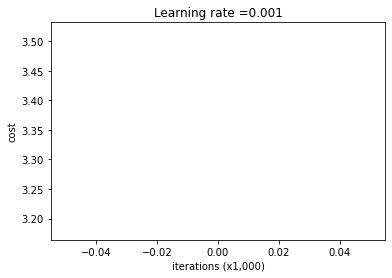

On the training set:
input X  (784, 1000)
W1 (500, 784)
b1 (500, 1)
W2 (250, 500)
b2 (250, 1)
W3 (100, 250)
b3 (100, 1)
W4 (10, 100)
b4 (10, 1)
Z1 (500, 1000)
Z2 (250, 1000)
Z3 (100, 1000)
A3 (100, 1000)
Z4 (10, 1000)
Accuracy: 0.903


/tmp/ipykernel_41478/2396437680.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.zeros((1,m), dtype = np.int)


In [37]:
parameters = model(train_set_x, y_train)
print ("On the training set:")
predictions_train = predict(train_set_x, y_train, parameters)
